In [42]:
import numpy as np
import cv2
from scipy.ndimage import gaussian_filter, laplace

size = 64
img = np.zeros((size, size))
img[:, :] = 100

cv2.circle(img, (size // 2, size // 2), size // 8, 200, -1)

rho = 6.0

levelset = initContour(np.zeros((size, size)), rho)

iter_num = 1
epsilon = 1.5
for i in range(iter_num):
    delta = np.zeros((size, size))
    delta[np.where(np.abs(levelset) < epsilon)] = 1 / (2 * epsilon) * (
        1 + np.cos(levelset[np.where(np.abs(levelset) < epsilon)] * np.pi / epsilon))
    # print(len(delta[np.where(np.abs(levelset) < epsilon)]))
                              #1 / (2 * epsilon) * (1 + np.cos(np.pi * levelset / epsilon)), 0)]
    #denergy = calcInnerEnergy(phi) + calcLineEnergh(phi, g) + calcRegionEnergy(phi, g)


In [43]:
def initContour(levelset, rho):
    width = levelset.shape[1]
    height = levelset.shape[0]

    left = width // 4
    right = width - left
    top = height // 4
    bottom = height - top

    levelset[top + 1:bottom, left + 1:right] = -rho
    levelset[:top, :] = levelset[bottom + 1:] = levelset[:, :left] = levelset[:, right + 1:] = rho

    return levelset


In [23]:
def calcEdgeFunc(img):
    gauss = gaussian_filter(img, 1)
    dx, dy = np.gradient(gauss)
    edge_func = 1.0 / (np.hypot(dx, dy) + 0.001)
    return edge_func

edge_func = calcEdgeFunc(img)

In [24]:
def calcInnerEnergy(phi):
    phi_lap = laplace(phi)
    dx, dy = np.gradient(phi)
    dxx, dxy = np.gradient(dx)
    dyx, dyy = np.gradient(dy)
    curv = dxx * dy ** 2 - (dxy + dyx) * dx * dy + dyy * dx ** 2 / ((np.hypot(dx, dy)) ** 1.5 + 0.001)
    return phi_lap - curv

inter = calcInnerEnergy(levelset)

In [ ]:
def calcLineEnergy(phi, delta, g):
    

In [ ]:
def calcRegionEnergy(phi, delta, g):
    

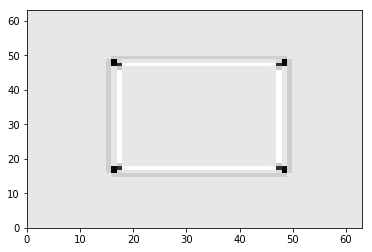

In [25]:
import matplotlib.pyplot as plt


def show_img(img):
    xgrid, ygrid = np.meshgrid(np.arange(size), np.arange(size))

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.pcolor(xgrid, ygrid, img, cmap="gray", linewidth=0)
    
    plt.show()

show_img(inter)
